## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?


In [256]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm
import scipy.stats as stats

In [7]:
path = r"C:\Users\elham\OneDrive\Documents\IRONHACK\lab\EDA\amz_uk_price_prediction_dataset.csv"
data = pd.read_csv(path)

In [9]:
df=data.copy()

In [11]:
#datacleaning
df.columns = [col.lower().replace(" ", "_") for col in df.columns]

In [13]:
df.shape

(2443651, 9)

In [15]:
df.isnull().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isbestseller         0
boughtinlastmonth    0
category             0
dtype: int64

In [21]:
df.columns

Index(['asin', 'title', 'stars', 'reviews', 'price', 'isbestseller',
       'boughtinlastmonth', 'category'],
      dtype='object')

In [17]:
df.head()

,uid,asin,title,stars,reviews,price,isbestseller,boughtinlastmonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [19]:
# removing id column
df = df.drop(columns=["uid"])

# General Selection for categorical and numerical data
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")

# Being specific
cat_from_num = num.loc[:, num.nunique() < 20] 
cat = pd.concat([cat, cat_from_num], axis=1)

num = num.drop(columns=cat_from_num.columns)

### Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

In [96]:
crosstab_analysis = pd.crosstab(df['isbestseller'], df['category']).T
crosstab_analysis

isbestseller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [29]:
pd.crosstab(df['isbestseller'], columns='count')

col_0,count
isbestseller,
False,2435671
True,7980


Are there categories where being a best-seller is more prevalent?
Sport and Outdoor has the highest number of best seller followed by Beauty

In [67]:
# Sort by the total row count
crosstab_analysis['total'] = crosstab_analysis.sum(axis=1)  # Add total
crosstab_analysis = crosstab_analysis.sort_values(by='total', ascending=False)
crosstab_analysis

isbestseller,False,True,total
category,,,
Sports & Outdoors,835935,330,2508795
Beauty,19010,302,57936
"Handmade Clothing, Shoes & Accessories",19215,14,57687
Bath & Body,19059,33,57276
Birthday Gifts,18943,35,56934
...,...,...,...
Motorbike Chassis,107,0,321
Plugs,106,1,321
Alexa Built-In Devices,106,1,321


### Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.

In [100]:
chi2_stats, chi2_pvalue, dof, expected = chi2_contingency(crosstab_analysis)
print(f"chi2_pvalue: {chi2_pvalue:.40f}")

chi2_pvalue: 0.0000000000000000000000000000000000000000


The low p -value implies that we can reject the null hypothesis. This implies that there's a significant association between two varibles of category and isbestseller.

Compute Cramér's V to understand the strength of association between best-seller status and category.

In [90]:
association(crosstab_analysis, method='cramer')

0.043233549454462075

Cremer measuring strength of this association, 0.0432 is a weak association. 

### Visualizations:

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Figure size 1200x600 with 0 Axes>

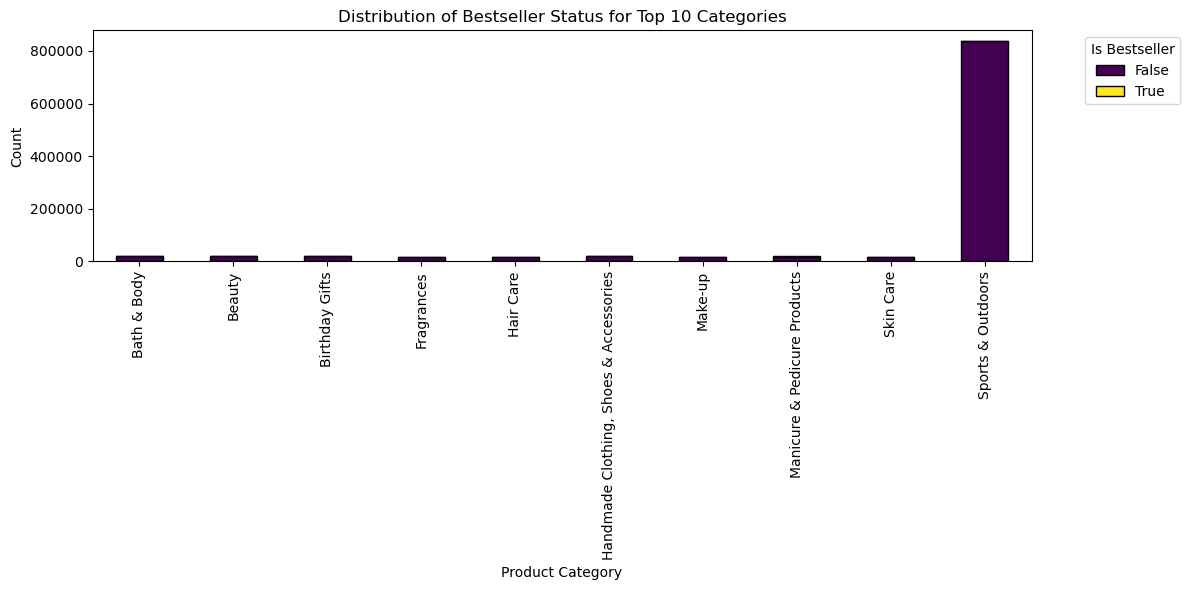

In [311]:
top_categories = df['category'].value_counts().nlargest(10).index

# Filter for the top 10 categories
filtered_df = df[df['category'].isin(top_categories)]

# Group by category and best seller 
grouped = filtered_df.groupby(['category', 'isbestseller']).size().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 6), edgecolor='black')

plt.title("Distribution of Bestseller Status for Top 10 Categories")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Is Bestseller", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [126]:
df['isbestseller'].value_counts()

isbestseller
False    2435671
True        7980
Name: count, dtype: int64

C:\Users\elham\AppData\Local\Temp\ipykernel_22004\1444860824.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=Top_10, x="category", palette="coolwarm")


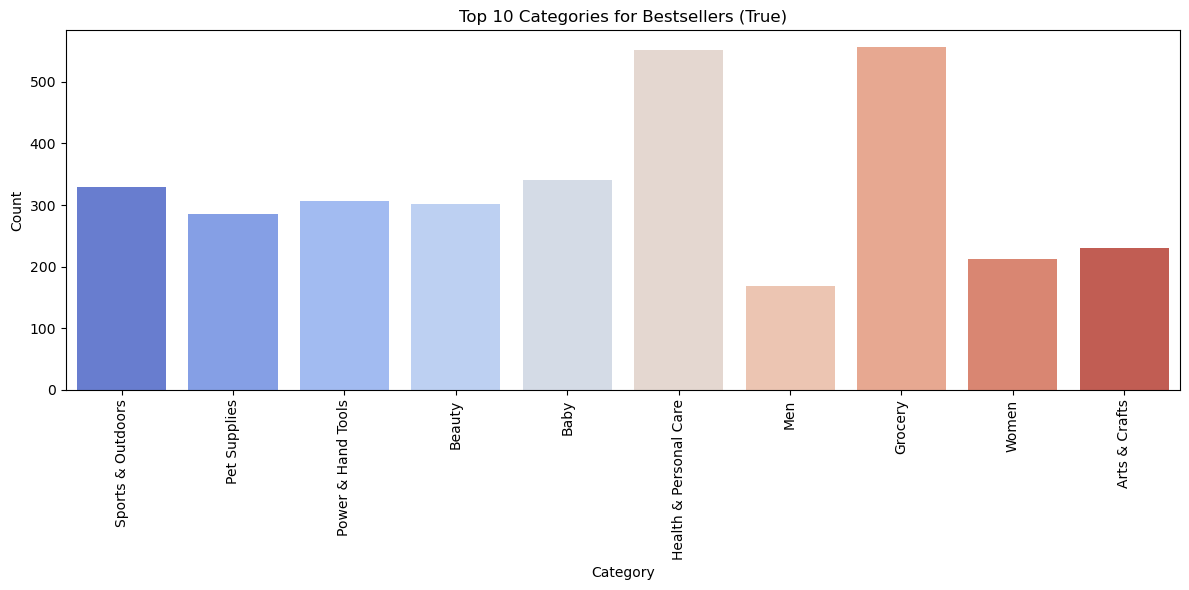

In [315]:
#Filtering data for best seller be True, and top 10 
True_df = df[df['isbestseller'] == True]
top_categories = True_df['category'].value_counts().nlargest(10).index
Top_10 = True_df[True_df['category'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.countplot(data=Top_10, x="category", palette="coolwarm")
plt.title("Top 10 Categories for Bestsellers (True)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

### Preliminary Step: Remove outliers in product prices.

In [138]:
#Interquartile range to check if any values is outlier
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lowerQ_bound = Q1 - 1.5 * IQR
upperQ_bound = Q3 + 1.5 * IQR

In [140]:
lowerQ_bound

-44.01

In [142]:
upperQ_bound

99.99000000000001

In [152]:
outliers = df[(df['price'] < lowerQ_bound)| (df['price'] > upperQ_bound)]
outliers

,asin,title,stars,reviews,price,isbestseller,boughtinlastmonth,category
10,B08VDNCZT9,JBL Charge 5 - Portable Bluetooth Speaker with...,4.8,11920,139.00,False,0,Hi-Fi Speakers
19,B07NQCKJSH,Echo Studio | Our best-sounding Wi-Fi and Blue...,4.5,14222,164.99,False,0,Hi-Fi Speakers
25,B0BLS36M5R,All-new Echo Show 8 | 3rd generation (2023 rel...,0.0,0,149.99,False,0,Hi-Fi Speakers
28,B096G3R7C3,JBL PartyBox110 Portable Indoor and Outdoor Pa...,4.8,153,289.00,False,0,Hi-Fi Speakers
31,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...
2443619,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2443627,B005QN452A,Racer Beasty Ladies Leather Motorbike Trousers,3.8,181,152.58,False,0,Motorbike Clothing
2443638,B084R261ML,"SHIMA EXO Vented, Motorbike Shoes for Women | ...",4.6,209,108.77,False,0,Motorbike Clothing
2443641,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing


In [ ]:
#filtering out the outliers and defining as dfn
dfn = df[~((df['price'] < lowerQ_bound) | (df['price'] > upperQ_bound))]

### Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.

C:\Users\elham\AppData\Local\Temp\ipykernel_22004\1150409023.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=Top_20_dfn, x="category", y="price", palette="coolwarm")


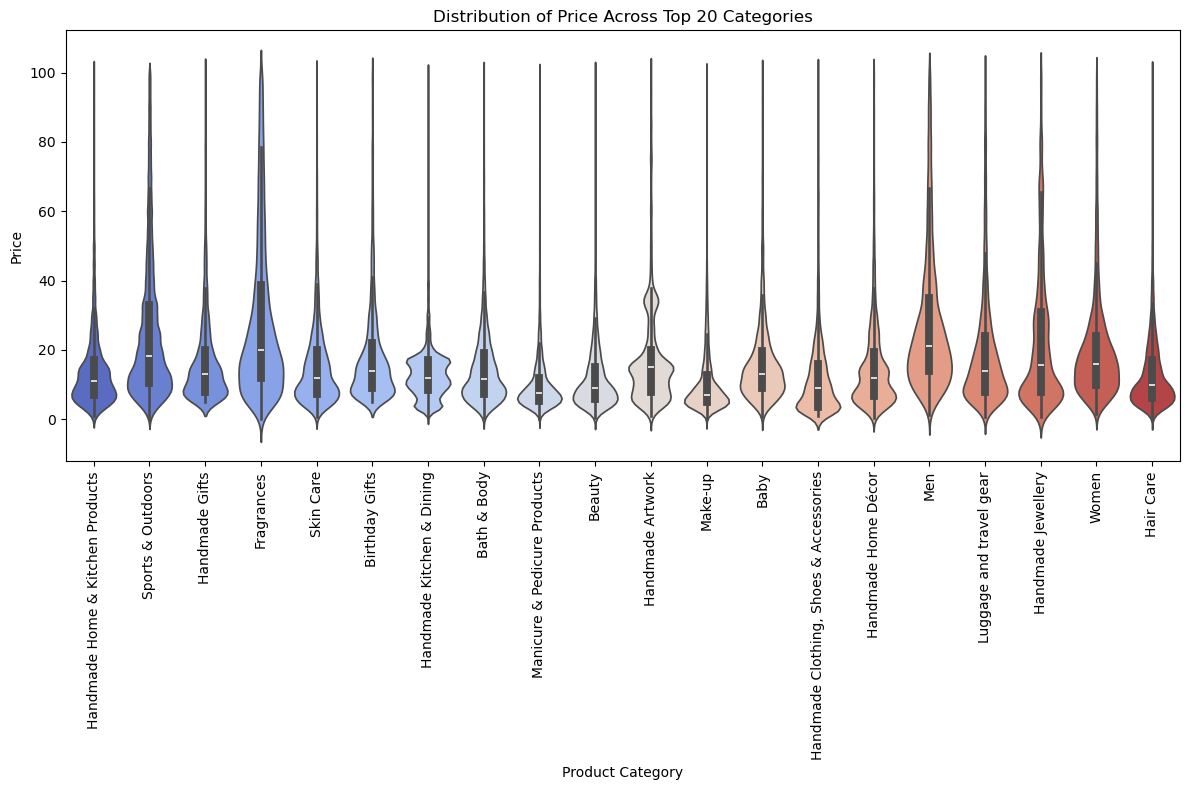

In [289]:
top_categories = dfn['category'].value_counts().nlargest(20).index
Top_20_dfn = dfn[dfn['category'].isin(top_categories)]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=Top_20_dfn, x="category", y="price", palette="coolwarm")
plt.title("Distribution of Price Across Top 20 Categories")
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

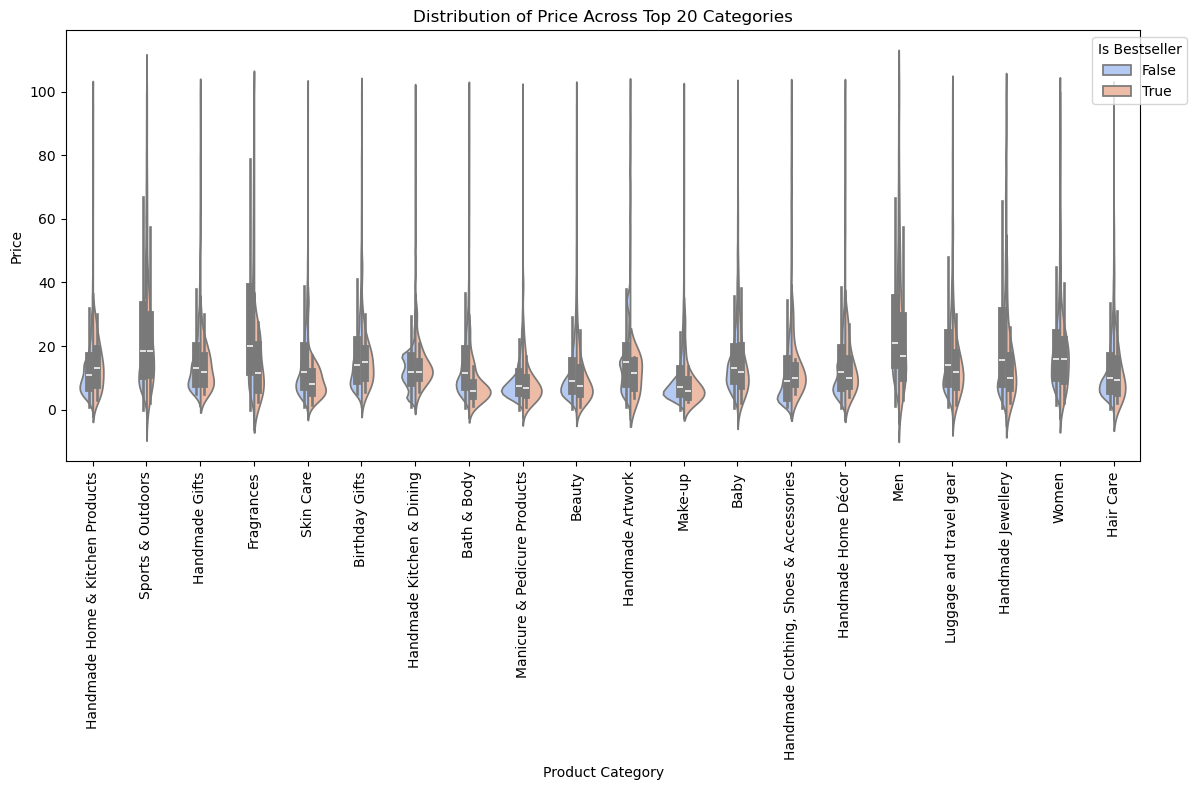

In [295]:
top_categories = dfn['category'].value_counts().nlargest(20).index
Top_20_dfn = dfn[dfn['category'].isin(top_categories)]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=Top_20_dfn, x="category", y="price", hue="isbestseller", palette="coolwarm", split=True)

plt.title("Distribution of Price Across Top 20 Categories")
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.legend(title="Is Bestseller", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Which product category tends to have the highest median price? Don't filter here by top categories.
Desktop PCs has the highest median

In [188]:
median_prices = dfn.groupby('category')['price'].median().sort_values(ascending=False)
median_prices

category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

### Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

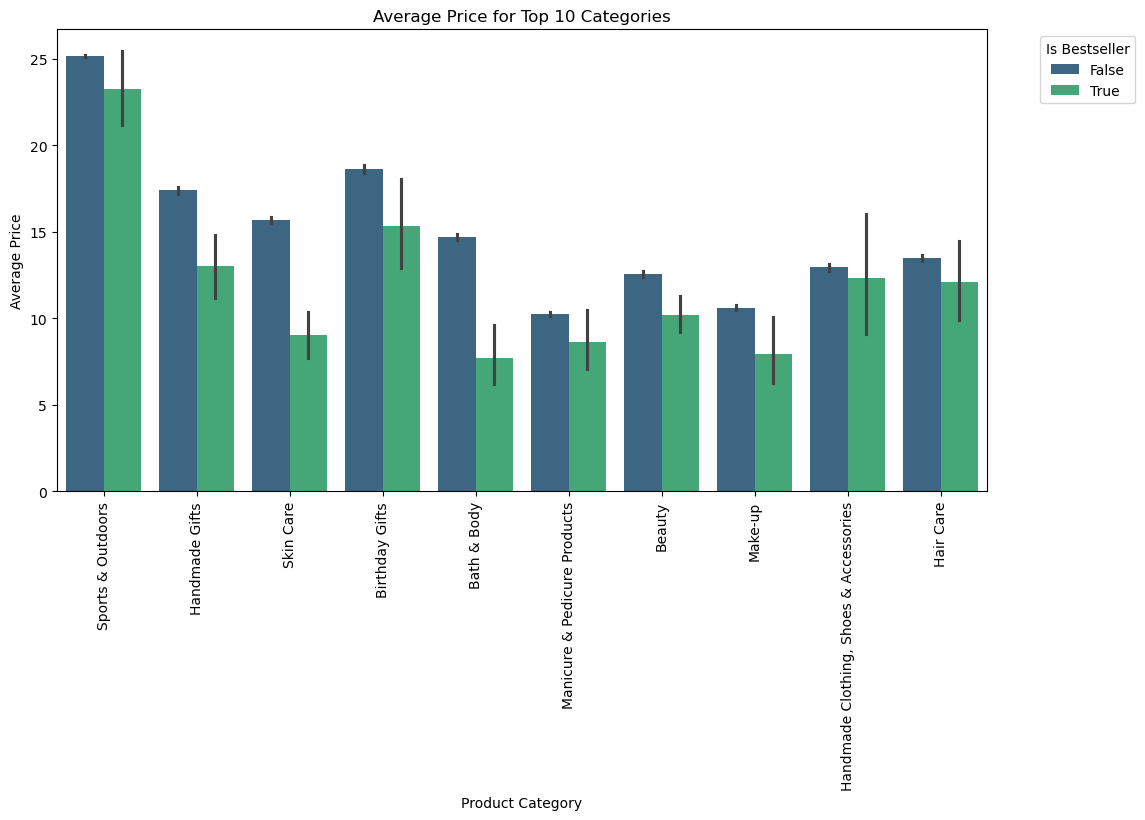

In [283]:
top_categories = dfn['category'].value_counts().nlargest(10).index

Top_df = dfn[dfn['category'].isin(top_categories)]

plt.figure(figsize=(12, 6))
sns.barplot(data=Top_df,x="category", y="price", hue="isbestseller",  estimator="mean",palette="viridis")

plt.title("Average Price for Top 10 Categories")
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.xticks(rotation=90)
plt.legend(title="Is Bestseller", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Which product category commands the highest average price? Don't filter here by top categories. Motherboards with 68.772432 average price

In [198]:
average_prices = dfn.groupby('category')['price'].mean().sort_values(ascending=False)
average_prices

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

### Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

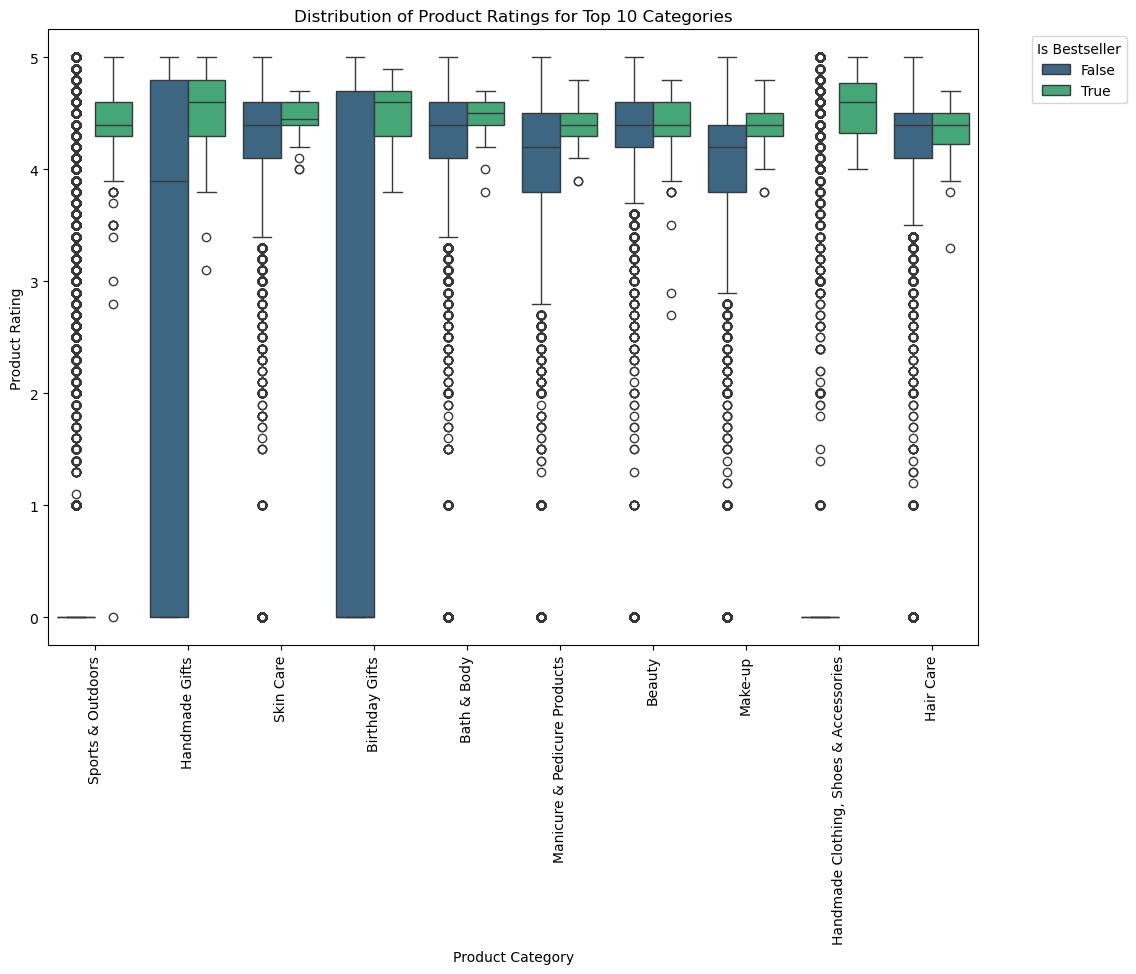

In [281]:
top_categories = dfn['category'].value_counts().nlargest(10).index
Top_df = dfn[dfn['category'].isin(top_categories)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=Top_df, x="category", y="stars", palette="viridis", hue="isbestseller" )

plt.title("Distribution of Product Ratings for Top 10 Categories")
plt.xlabel("Product Category")
plt.ylabel("Product Rating")
plt.xticks(rotation=90)
plt.legend(title="Is Bestseller", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Which category tends to receive the highest median rating from customers? Don't filter here by top categories. Computer Memory with median of 4.7

In [269]:
median_rating = dfn.groupby('category')['stars'].median().sort_values(ascending=False)
median_rating

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
                               ... 
Hockey Shoes                    0.0
Hi-Fi Receivers & Separates     0.0
Handmade Kitchen & Dining       0.0
Handmade Jewellery              0.0
eBook Readers & Accessories     0.0
Name: stars, Length: 296, dtype: float64

## Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

### Correlation Coefficients:

Calculate the correlation coefficient between price and stars

In [222]:
correlation_coefficient_pearson = dfn['price'].corr(dfn['stars'])
print(f"correlation coefficient: {correlation_coefficient_pearson:.4f}")

correlation coefficient: -0.0777


In [224]:
correlation_coefficient_spearman = dfn['price'].corr(dfn['stars'],method='spearman')
print(f"correlation coefficient: {correlation_coefficient_spearman:.4f}")

correlation coefficient: -0.0668


Is there a significant correlation between product price and its rating?
correlation coefficient suggest a weak and negative relationship between variables

### Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

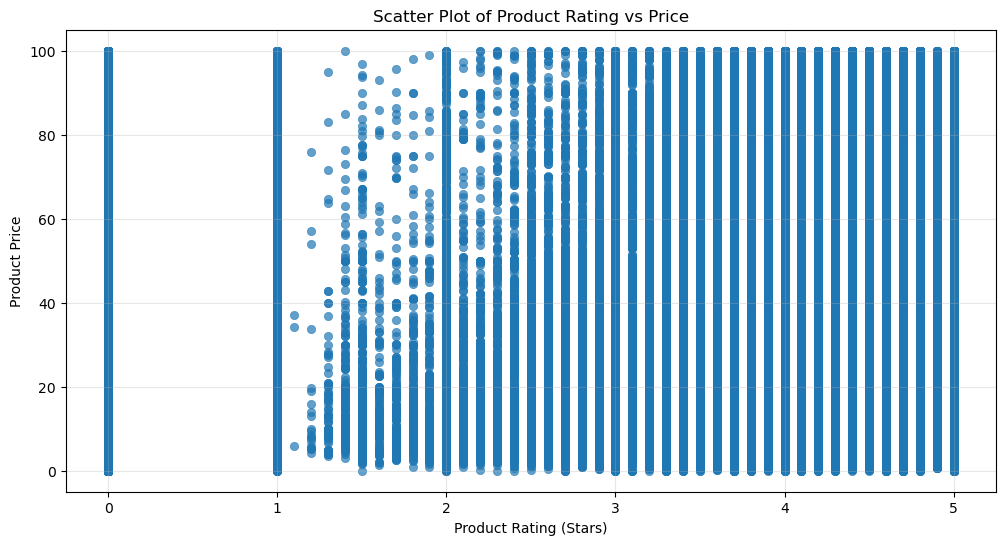

In [266]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=dfn, x='stars', y='price', alpha=0.7, edgecolor=None)
plt.title("Scatter Plot of Rating vs Price")
plt.xlabel("Star Rating")
plt.ylabel("Price")
plt.grid(alpha=0.3)
plt.show()

High star ratings has more concentration of data points, meaning across all different prices, products recieved star rating of 3.5 and above. 
Rating between 1 and 2, there are less datapoint and most of product is purchased with lower price than 40 compared to price of 10. 

Use a correlation heatmap to visualize correlations between all numerical variables.

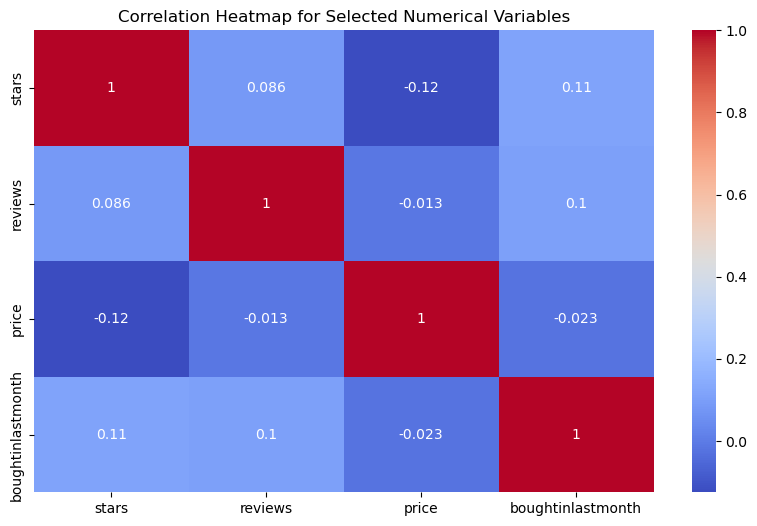

In [242]:
correlation_matrix = num.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

Examine if product prices typically follow a normal distribution using a QQ plot.
The lower left tail deviates from the red line and is flat indicating few low prices. 
The right upper tail deviates from the red line in a curve shape indicating the distribution is long right tail than normal distibution (right skewed). More data with high price. 
The price data is not normally distributed. It appears to be right-skewed with potential outliers on the higher end and has heavier tails than a normal distribution.
The middle part following fromal distibution, and there are some outliers at extreme ends. 

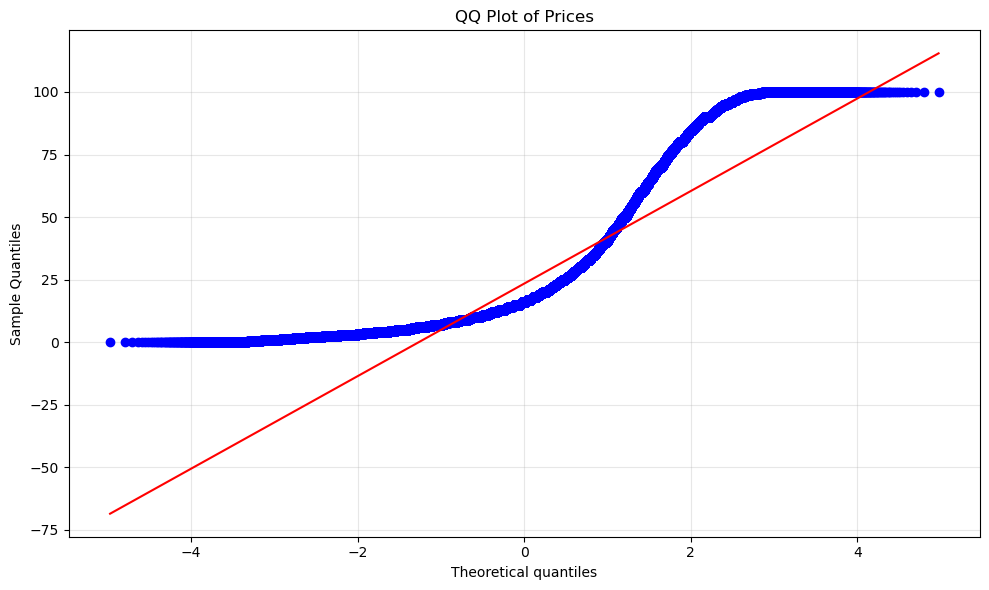

In [260]:
#QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(dfn['price'], dist="norm", plot=plt)

plt.title("QQ Plot of Prices")
plt.ylabel("Sample Quantiles")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

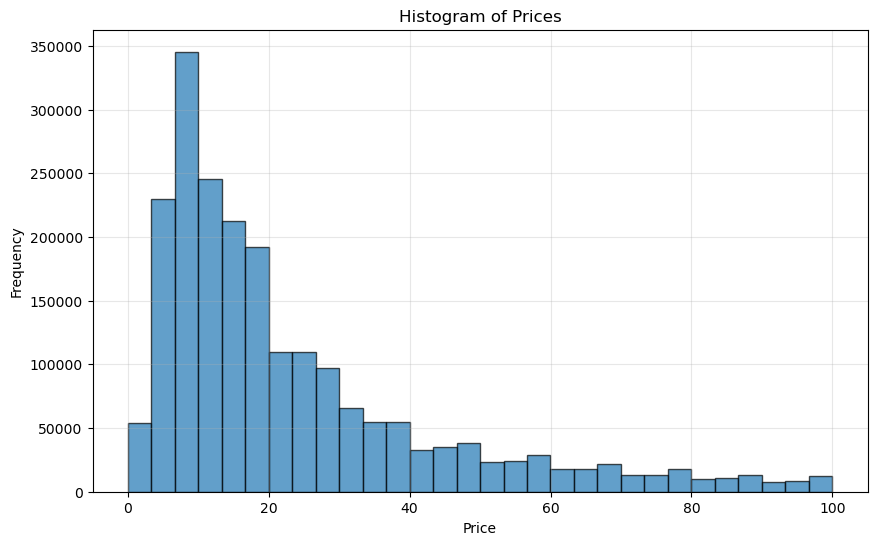

In [264]:
#Plot histogram for better visulaization of normal distribution
plt.figure(figsize=(10, 6))
plt.hist(dfn['price'], bins=30, edgecolor="black", alpha=0.7)

plt.title("Histogram of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(alpha=0.3)
plt.show()